<h1>Data Preprocessing and Analysis

<h5>Using the data set Dynamically Generated Hate Speech Dataset Dynamically Generated Hate Speech Dataset (kaggle.com)

#Stage one: exploring the data
> Loading the dataset

> Exploring the dataset

> Balancing the dataset

#Loading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install truecase

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.4/28.4 MB 9.3 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow-text==2.8.2

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import re

import spacy, re
from truecase import get_true_case
import nltk

In [ ]:
nltk.download('punkt')
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In order to find out what preprocessing we need to perform, we must explore the datasets and see what's wrong with each. Look for problems in it and solve them. So I first imported all necessary libraries.  

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/labeled_data.csv")
data.head(5)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


The above table shows the data as 8 columns, since we need only the label column (class) and the tweet column, we will drop the rest. The classes present are hate_speech, offensive_language and neither.

In [ ]:
# Droping unused coloumn
data = data.drop(['Unnamed: 0','count','hate_speech','offensive_language','neither'], axis=1)

#Exploring the dataset

Below are the only three labels present

In [ ]:
label_counts = data['class'].value_counts()
unique_labels = label_counts.index
display(print(label_counts))

1    19190
2     4163
0     1430
Name: class, dtype: int64


None

below are the three classes, 0 - hate speech 1 - offensive language 2 - neither

In [ ]:
print(unique_labels)

Int64Index([1, 2, 0], dtype='int64')


Below are the first seven tweets

In [ ]:
for index,text in enumerate(data['tweet'][40:57]):
  print('text %d:\n'%(index+1),text)

text 1:
 " momma said no pussy cats inside my doghouse "
text 2:
 " most hated but the hoes favorite " #2MW #SevenOne # http://t.co/BMdSVMc3rC
text 3:
 " nice girls bad, make me get naughty. Bad yello hoe, real nice body. Down south chick, like em real thick" http://t.co/bzRDl3kF7U
text 4:
 " pimps up pimps up hoes down " Future voice
text 5:
 " post a picture of that pussy get 200 likes "
text 6:
 " pussy is a powerful drug " &#128517; #HappyHumpDay http://t.co/R8jsymiB5b
text 7:
 " quick piece of pussy call it a drive by "
text 8:
 " running round here like some brand new pussy thats bout to get fucked "
text 9:
 " these bitches even worst they'll send them guys for you "
text 10:
 " these hoes like niggas that spend money not talk bout it "
text 11:
 " we dont trust these niggas all these bitches "
text 12:
 " yall niggas b cuffing hoes cause yall aint never have bitches "
text 13:
 " you dodge a bullet " &#128517; &#8220;@DaRealKha: "All da bitches I cut off pregnant or bound to be

This shows how dirty the data is, we need to remove all unnecessary punctuations, special characters and numbers. This will be in the data cleaning stage, for now we will continue data exploring

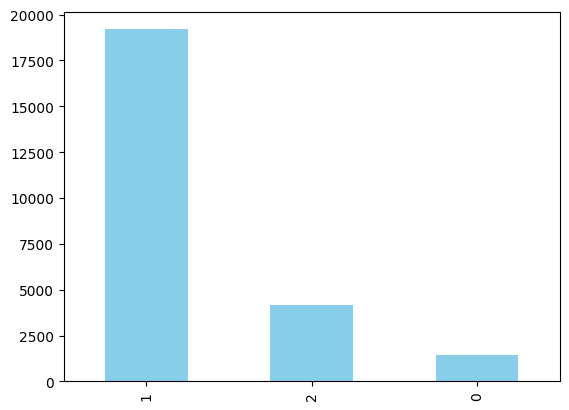

In [ ]:
count = data['class'].value_counts().plot(kind="bar", color="skyblue")

The above bar chart shows how imbalanced the dataset is which will result in a biased model, therefore, we will be undersampling the majority class 1 and oversampling the minority class 0.

In [ ]:
def score(score):
    if score == '1':
        return "offensive Lang"
    if score == '2':
        return "niether"
    if score == '0':
        return "hate"

In [ ]:
"""data['class'] = data['class'].apply(score)
class_counts = data['class'].value_counts()

plt.pie(class_counts, labels=data['class'].unique().tolist(), autopct='%1.1f%%')
plt.show()
"""


"data['class'] = data['class'].apply(score)\nclass_counts = data['class'].value_counts()\n\nplt.pie(class_counts, labels=data['class'].unique().tolist(), autopct='%1.1f%%')\nplt.show()\n"

Below is checking if there are null values

In [ ]:
print("Total Null values count: ",
      data.isnull().sum())

Total Null values count:  Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64


#Balancing the dataset

Below we will perform undersampling to the majority class

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
#Finding the pre-undersampling counts
print(Counter(data['class']))

Counter({1: 19190, 2: 4163, 0: 1430})


In [ ]:
#reshape the columns for undersampling
reshaped_tweet = data['tweet'].values.reshape(-1, 1)
reshaped_target =data['class'].values.reshape(-1, 1)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter


undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_over, y_over = undersample.fit_resample(reshaped_tweet, reshaped_target)

print(Counter(y_over))

# Creating a new DataFrame with the balanced data
balanced_df = pd.DataFrame({'tweet': X_over.flatten(), 'class': y_over})


Counter({0: 1430, 1: 1430, 2: 1430})


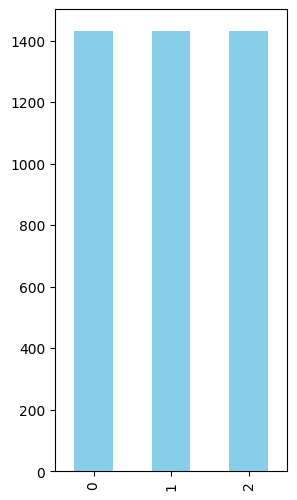

In [ ]:
"""This shows that the class are now all balanced """

#bar chart to display the class disributions
count = balanced_df['class'].value_counts().plot(figsize=(3, 6),kind="bar", color="skyblue")

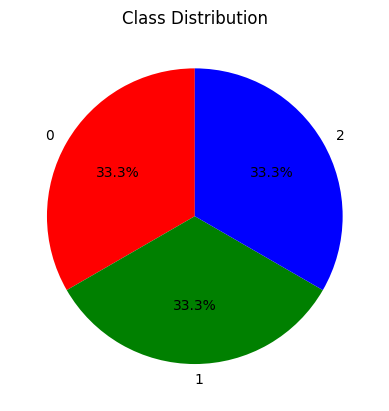

In [ ]:
#Counting occurrences of each class
class_counts = balanced_df['class'].value_counts()

#Creating a pie chart
colors = ['red', 'green','blue']
labels = class_counts.index
plt.pie(class_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')
plt.show()


#<h3>Stage Two: Data Cleaning

>Removing Punctuation

>Removing mentions

>Removing URLs,special characters, emojis..

>True Casing

In [ ]:
# Function to remove usernames and mentions from a tweet
def remove_usernames_mentions(tweet):
    cleaned_tweet = re.sub(r'@\w+', '', tweet)
    return cleaned_tweet

In [ ]:
def clean_tweet(tweet):
    tweet = re.sub(r'#\w+', '', tweet)
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet) #Remove special characters and numbers
    tweet = re.sub(r"[!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n -' ]"," ",tweet)
    tweet = tweet.lower() #Convert to lowercase
    tweet = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", tweet)
    tweet = re.sub(r'[^\w\s]', '', tweet)
    tweet =  re.sub(r'@[\w]+', '',tweet)                     # remove twitter handles
    #tweet = re.sub(r'@\S+', '', tweet)
    tweet =  re.sub(r'pic.\S+', '',tweet)
    tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', tweet+' ')      # keep words with length>1 only
    tweet =  re.sub(r'http\S+', '',tweet)                  # remove urls
    #cleaned_text = ' '.join(tweet)
    return  " ".join(tweet.split()) #remove white spaces

<h3>True Casing

In [ ]:
def truecase_tweet(tweet):
    # Process the input tweet using spaCy
    doc = nlp(tweet)

    # Extract the word and its part-of-speech (POS) tag for each token in the processed text
    tagged_sent = [(w.text, w.tag_) for w in doc]

    # Normalize the sentence by capitalizing nouns (NN and NNS)
    normalized_sent = [w.capitalize() if t in ["NN", "NNS"] else w for (w, t) in tagged_sent]

    # Join the normalized words into a string and remove unnecessary spaces before punctuation
    normalized_string = re.sub(" (?=[\.,'!?:;])", "", ' '.join(normalized_sent))

    # Apply truecasing to the normalized string
    truecased_string = get_true_case(normalized_string)

    return truecased_string

In [ ]:
balanced_df['cleaned_tweet'] = balanced_df['tweet'].apply(remove_usernames_mentions)
balanced_df['cleaned_tweet'] = balanced_df['cleaned_tweet'].apply(clean_tweet)
# Apply truecasing to all tweets in the "tweet" column
balanced_df['truecased_tweet'] = balanced_df['cleaned_tweet'].apply(truecase_tweet)

In [ ]:
# Display the DataFrame with truecased tweets
print(balanced_df[['tweet', 'truecased_tweet']])

                                                  tweet  \
0     "@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1...   
1     "@CB_Baby24: @white_thunduh alsarabsss" hes a ...   
2     "@DevilGrimz: @VigxRArts you're fucking gay, b...   
3     "@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL...   
4     "@NoChillPaz: "At least I'm not a nigger" http...   
...                                                 ...   
4285  RT @juliebenz: I drink unicorn tears... RT @th...   
4286                   I see ya big Boi in the Oreo V's   
4287  RT @pgammo: That the Yankees have won four str...   
4288  RT @FunnyOGtweets: When rednecks fool around w...   
4289  @Jpizzle651 I didn't really have one, was awar...   

                                        truecased_tweet  
0                                          Queer Gaywad  
1     Alsarabsss he s Beaner Smh you can tell he s M...  
2     You re Fucking gay Blacklisted Hoe holding out...  
3     Lmfaoooo hate black people this is why there s...  
4

#Stage three: EDA

>Word EDA

>Stop word Removal

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [ ]:
#initial Tokenization for EDA purposes
balanced_df['cleanedTokens'] = balanced_df['truecased_tweet'].apply(word_tokenize)

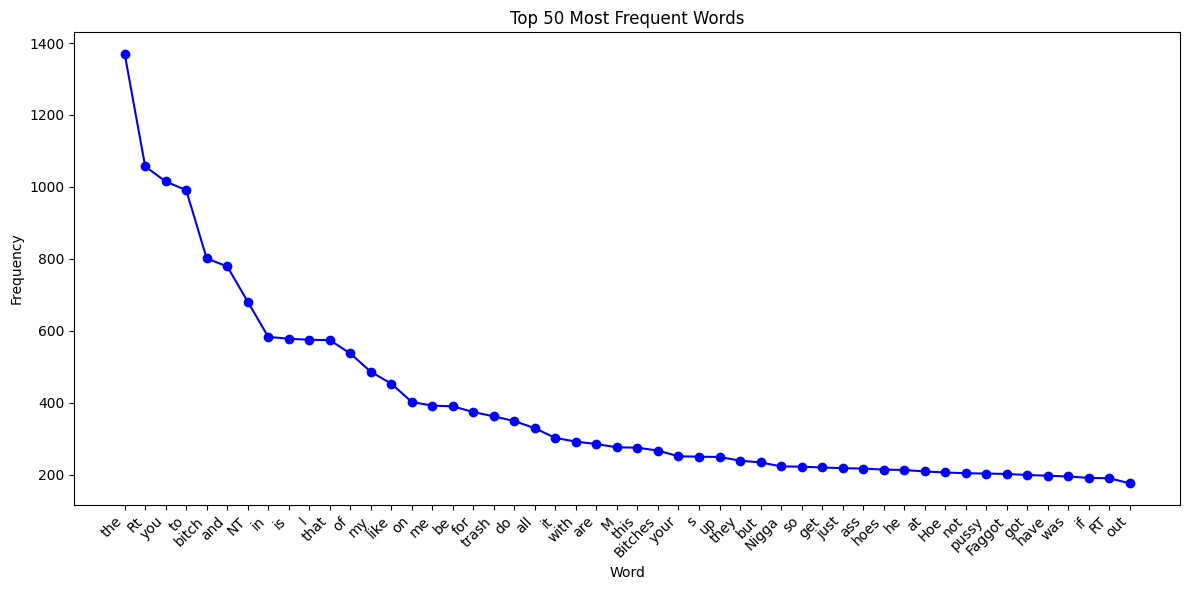

In [ ]:
# Flatten the list of processed words
all_words = [word for sublist in balanced_df['cleanedTokens'] for word in sublist]

# Get the 50 most frequent words
word_freq = Counter(all_words)
top_words = word_freq.most_common(50)

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(*zip(*top_words), marker='o', linestyle='-', color='b')
plt.title('Top 50 Most Frequent Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This shows that we need to remove the stopw words

In [ ]:
#stop word removal
from nltk.corpus import stopwords
nltk.download('stopwords')
#print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))
balanced_df['cleanedTokens'] = balanced_df['cleanedTokens'].apply(lambda x: [word for word in x if word not in stop_words])

In [ ]:
balanced_df.head()

,tweet,class,cleaned_tweet,truecased_tweet,cleanedTokens
0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1...",0,queer gaywad,Queer Gaywad,"[Queer, Gaywad]"
1,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ...",0,alsarabsss hes beaner smh you can tell hes mex...,Alsarabsss he s Beaner Smh you can tell he s M...,"[Alsarabsss, Beaner, Smh, tell, Mexican]"
2,"""@DevilGrimz: @VigxRArts you're fucking gay, b...",0,youre fucking gay blacklisted hoe holding out ...,You re Fucking gay Blacklisted Hoe holding out...,"[You, Fucking, gay, Blacklisted, Hoe, holding,..."
3,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL...",0,lmfaoooo hate black people this is why theres ...,Lmfaoooo hate black people this is why there s...,"[Lmfaoooo, hate, black, people, black, people,..."
4,"""@NoChillPaz: ""At least I'm not a nigger"" http...",0,at least im not nigger lmfao,At least I m not nigger Lmfao,"[At, least, I, nigger, Lmfao]"


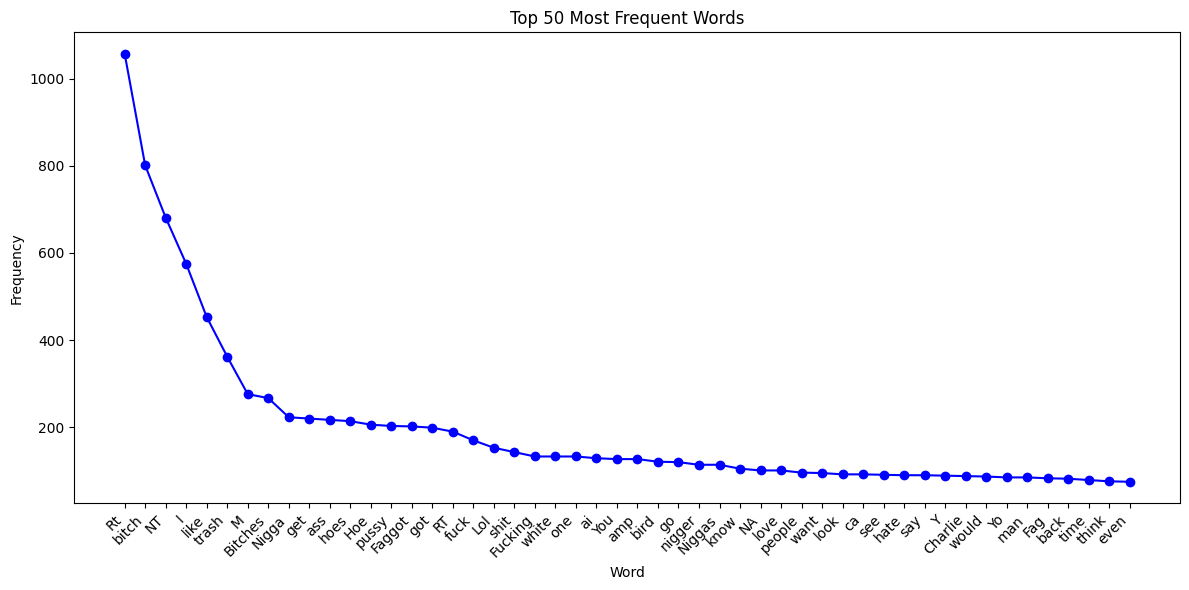

In [ ]:
# Flattening
all_words = [word for sublist in balanced_df['cleanedTokens'] for word in sublist]

# getting the 50 most frequent words
word_freq = Counter(all_words)
top_words = word_freq.most_common(50)

# Plotting the line graph
plt.figure(figsize=(12, 6))
plt.plot(*zip(*top_words), marker='o', linestyle='-', color='b')
plt.title('Top 50 Most Frequent Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import string

In [ ]:
# Thanks to https://www.kaggle.com/vbmokin/nlp-with-dt-simple-transformers-research
def plot_word_cloud(x, col, num_common_words, stop_words):
    # Building the WordCloud for the num_common_words most common data in x[col] without words from list stop_words

    # Calculation common words
    corpus = " ".join(x[col].str.lower())
    punc_str = string.punctuation.replace("'","")
    corpus = corpus.translate(str.maketrans('', '', punc_str))
    corpus_without_stopwords = [word for word in corpus.split() if word not in stop_words]
    common_words = Counter(corpus_without_stopwords).most_common(num_common_words)

    # Build Word Cloud
    plt.figure(figsize=(12,8))
    word_cloud = WordCloud(stopwords = stop_words,
                           background_color='black',
                           max_font_size = 80
                           ).generate(" ".join(corpus_without_stopwords))
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.show()

    return common_words

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words = list(STOPWORDS) + list('0123456789') + ['rt', 'amp', 'us', 'will', 'via', 'dont', 'cant', 'u', 'work', 'im', 'rubyph',
                               'got', 'back', 'first', 'one', 'two', 'know', 'going', 'time', 'go', 'may', 'youtube', 'say', 'day', 'love',
                               'still', 'see', 'watch', 'make', 'think', 'even', 'right', 'left', 'take', 'want', 'http', 'https', 'co','typhoon',
                               'hagupit']

Word Cloud for training data without stopwords


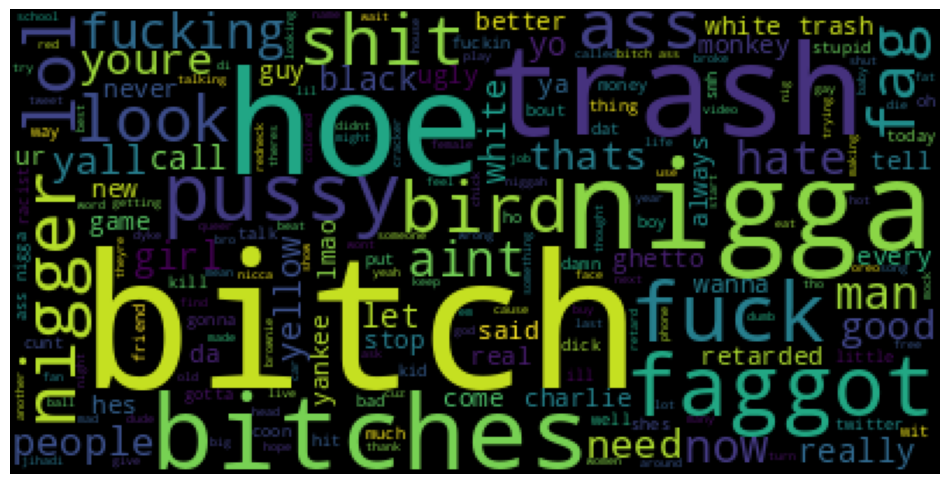

[('bitch', 839),
 ('trash', 366),
 ('bitches', 267),
 ('nigga', 223),
 ('hoes', 221),
 ('ass', 217),
 ('fuck', 216),
 ('pussy', 208),
 ('hoe', 206),
 ('faggot', 202)]

In [ ]:
print('Word Cloud for training data without stopwords')
plot_word_cloud(balanced_df, 'cleaned_tweet', 10, stop_words)

#Stop word removal

In [ ]:
#stop word removal
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
balanced_df['tweet_without_stopwords'] = balanced_df['truecased_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
balanced_df['tweet_without_stopwords']

0                                            Queer Gaywad
1                      Alsarabsss Beaner Smh tell Mexican
2          You Fucking gay Blacklisted Hoe holding anyway
3         Lmfaoooo hate black people black people niggers
4                                 At least I nigger Lmfao
                              ...                        
4285    Rt drink Unicorn tears RT say blondes NT age w...
4286                             I see ya big Boi Oreo vs
4287    Rt Yankees four straight Shane Greene starts s...
4288                     Rt Rednecks fool around aux cord
4289    Did NT really one aware Yankees always loved D...
Name: tweet_without_stopwords, Length: 4290, dtype: object

exploring cleaned data

In [ ]:
for index,text in enumerate(balanced_df['tweet_without_stopwords'][40:55]):
  print('text %d:\n'%(index+1),text)

text 1:
 Rt ALLS niggers wanNA fuck Tweet drink pineapple soda day
text 2:
 Are Asian black Hawaiian gay retarded drunk
text 3:
 Is full white trash
text 4:
 How play Deez Niggas Bitches Dat snakes
text 5:
 Referred Zimmerman creepy ass cracker racist thug
text 6:
 Do Pontiac sprinkler Nigga Nigga Nigga Nigga Nigga Nigga Nigga Nigga
text 7:
 Can get job Naacp AG hear like diversity tolerance long ai NT cracker
text 8:
 Is full white trash
text 9:
 Is full white trash
text 10:
 Are merely indicator something Wronggt celebrate unique Indiviuals GT
text 11:
 Is job white trash
text 12:
 
text 13:
 Racist month fuck Honkey
text 14:
 Rt Lmfao RT watching Porn amp beating amp Yo Homie text amp show name banner Faggot
text 15:
 Fucc Nicca Yu pose Pullin


In [ ]:
!pip install keras

In [ ]:
!pip install keras-preprocessing

In [ ]:
!pip install tensorflow_text

#Implementing Roberta

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

label_encoder = LabelEncoder()
balanced_df['class'] = label_encoder.fit_transform(balanced_df['class'])


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(
    balanced_df['tweet_without_stopwords'],  # Input features
    balanced_df['class'],                     # Target variable
    stratify=balanced_df['class'],             # Preserve class distribution in the splits
    test_size=0.2                              # 20% for testing (adjust as needed)
)

# Further splitting training set into training and validation sets
X_test ,X_valid, y_test, y_valid = train_test_split(
    X_temp,                                   # Input features (from previous split)
    y_temp,                                   # Target variable (from previous split)
    stratify=y_temp,                          # Preserve class distribution in the splits
    test_size=0.1                              # 10% for validation (adjust as needed)
)

In [ ]:
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
import tensorflow as tf
import tensorflow_hub as hub
from keras.models import load_model
import tensorflow_text as text

In [ ]:
roberta_preprocess = hub.KerasLayer("https://tfhub.dev/jeongukjae/xlm_roberta_multi_cased_preprocess/1")
roberta_encoder = hub.KerasLayer("https://tfhub.dev/jeongukjae/xlm_roberta_multi_cased_L-12_H-768_A-12/1")


In [ ]:
# roBerta layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = roberta_preprocess(text_input)
outputs = roberta_encoder(preprocessed_text)

# Neural network layers
x = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
x = tf.keras.layers.Dense(units=512)(x)
x = tf.keras.layers.Dense(units=256)(x)
x = tf.keras.layers.Dense(units=128)(x)
x = tf.keras.layers.Dense(units=64)(x)
x = tf.keras.layers.Dense(units=2, activation='sigmoid',name="output" )(x)


# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [x])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy')
]
opt = keras.optimizers.Adam(learning_rate=2e-5)
model.compile(optimizer=opt,
              loss="mse",
              metrics=METRICS)

In [ ]:
METRICS = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),#Calculates how often predictions match binary labels.
    tf.keras.metrics.Precision(name='precision'),#Computes the precision of the predictions with respect to the labels.
    tf.keras.metrics.Recall(name='recall')# Computes the recall of the predictions with respect to the labels.
]

opt = keras.optimizers.Adam(learning_rate=2e-5)

model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=METRICS)

In [ ]:
history = model.fit(X_train, y_train, validation_data= [X_valid,y_valid],epochs=3)

Epoch 1/3
108/108 [==============================] - 1139s 10s/step - loss: 0.6921 - accuracy: 0.3365 - val_loss: 0.6638 - val_accuracy: 0.3372
Epoch 2/3
108/108 [==============================] - 1114s 10s/step - loss: 0.6671 - accuracy: 0.3333 - val_loss: 0.6634 - val_accuracy: 0.3372
Epoch 3/3
108/108 [==============================] - 1103s 10s/step - loss: 0.6669 - accuracy: 0.3333 - val_loss: 0.6631 - val_accuracy: 0.3372


In [ ]:
print(test_df['class'].unique())


In [ ]:
train_df

In [ ]:
print(train_df['class'].dtype)
print(test_df['class'].dtype)

In [ ]:
for text_batch, label_batch in train_ds.take(1):
    for i in range(5):
        print(label_batch[i].numpy(), text_batch.numpy()[i])
        print()

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Embedding
from tensorflow.keras.layers import TextVectorization
from keras.optimizers import Adam

In [ ]:
# Create a custom standardization function to strip HTML break tags ''.
def custom_standardization(input_data):
    lowercase = tf.strings.lower(input_data)
    stripped_html = tf.strings.regex_replace(lowercase, '', ' ')
    return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation), '')


In [ ]:
# Vocabulary size and number of words in a sequence.
vocab_size = 5000
sequence_length = 100

# Use the text vectorization layer to normalize, split, and map strings to
# integers. Note that the layer uses the custom standardization defined above.
# Set maximum_sequence length as all samples are not of the same length.
vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=vocab_size,
    output_mode='int',
    output_sequence_length=sequence_length)


In [ ]:
# Make a text-only dataset (no labels) and call adapt to build the vocabulary.
text_ds = train_ds.map(lambda x, y: x)
vectorize_layer.adapt(text_ds)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM, Dropout

embedding_dim = 16


model = Sequential([
    vectorize_layer,
    Embedding(vocab_size, embedding_dim, name="embedding"),
    LSTM(64, return_sequences=True),  # LSTM layer with 64 units and return sequences
    LSTM(32),  # Another LSTM layer with 32 units
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(64, activation='relu'),  # Dense layer with 64 units and ReLU activation
    Dense(3, activation='softmax')
])



In [ ]:
import keras.backend as K

def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

#model.compile(optimizer='rmsprop',
              #loss='binary_crossentropy',
              #metrics=['accuracy', mean_pred])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
from keras.utils import to_categorical

In [ ]:
#y_train=to_categorical(y_train, num_classes = 3)
#y_test=to_categorical(y_test, num_classes = 3)

In [ ]:
from tensorflow.keras.utils import to_categorical

# Convert the true labels to categorical format
#y_train = to_categorical(y_train, num_classes=3)
#y_test = to_categorical(y_test, num_classes=3)

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=10
)

In [ ]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split

from keras.utils import to_categorical
import re
from keras.layers import Dense,LSTM, SpatialDropout1D, Embedding


In [ ]:
model = Sequential()
model.add(Embedding(232337, 100, input_length=X_train.shape[-1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(20, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
y_train=to_categorical(y_train, num_classes = 3)
y_test=to_categorical(y_test, num_classes = 3)

In [ ]:
len(X_test)

In [ ]:
len(y_train)

In [ ]:
len(y_test)

In [ ]:
len(X_train)

In [ ]:
epochs = 25
batch_size = 64

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=epochs, batch_size=batch_size)

In [ ]:
-